# **Phase 3 & 4: EDA & Visualizations**

## **📌 Step 3 : Exploratory Data Analysis (EDA)**

**Objective:**

Conduct comprehensive exploratory analysis to uncover patterns, trends, and disparities in HIV prevalence, AIDS-related deaths, and ART coverage across different countries and regions.

**Analysis Approach:**


*   Univariate Analysis - Understanding individual variable distributions
*   Bivariate Analysis - explores the relationship between two variables.
* Multivariate Analysis - analyzes three or more variables together to understand complex relationships.




**Tools Used:**

*   Pandas - Data manipulation and analysis
*   Matplotlib - Static visualizations
*   Seaborn - Statistical visualizations



# **1️⃣ Univariate Analysis**

**Objective**

Univariate analysis focuses on one variable at a time to understand:

. Data distribution

. Central tendency (mean, median)

. Spread (min, max, standard deviation)

. Outliers

. Category-wise frequency

In [ ]:
import pandas as pd
from google.colab import files
import zipfile
import io

uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

all_dfs = {}

with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as z:
    print("Files inside ZIP:", z.namelist())

    for file in z.namelist():
        if file.endswith(".csv"):
            df = pd.read_csv(z.open(file))
            all_dfs[file] = df
            print(f"Loaded: {file} → {df.shape}")


Saving HIV_AIDS_DATASET.zip to HIV_AIDS_DATASET (1).zip
Files inside ZIP: ['art_coverage_by_country_clean.csv', 'art_pediatric_coverage_by_country_clean.csv', 'no_of_cases_adults_15_to_49_by_country_clean.csv', 'no_of_deaths_by_country_clean.csv', 'no_of_people_living_with_hiv_by_country_clean.csv', 'prevention_of_mother_to_child_transmission_by_country_clean.csv']
Loaded: art_coverage_by_country_clean.csv → (170, 11)
Loaded: art_pediatric_coverage_by_country_clean.csv → (170, 11)
Loaded: no_of_cases_adults_15_to_49_by_country_clean.csv → (680, 7)
Loaded: no_of_deaths_by_country_clean.csv → (510, 7)
Loaded: no_of_people_living_with_hiv_by_country_clean.csv → (680, 7)
Loaded: prevention_of_mother_to_child_transmission_by_country_clean.csv → (170, 11)


In [ ]:
# Dictionary to store cleaned datasets
cleaned_missing_dfs = {}
name = "cleaned_dataset"

# Identify column types
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Fill numeric missing values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with mode
for col in categorical_cols:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])

# Save cleaned dataframe
cleaned_missing_dfs[name] = df

In [ ]:
zip_path = "HIV_AIDS_DATASET.zip"

# Dictionary to store all datasets
datasets = {}

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.endswith('.csv'):
            with zip_ref.open(file) as f:
                datasets[file] = pd.read_csv(f)

# Assign individual DataFrames
df_art = datasets['art_coverage_by_country_clean.csv']
df_pediatric = datasets['art_pediatric_coverage_by_country_clean.csv']
df_cases = datasets['no_of_cases_adults_15_to_49_by_country_clean.csv']
df_deaths = datasets['no_of_deaths_by_country_clean.csv']
df_plhiv = datasets['no_of_people_living_with_hiv_by_country_clean.csv']
df_pmtct = datasets['prevention_of_mother_to_child_transmission_by_country_clean.csv']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")



## **1. Histogram – ART Coverage (%)**

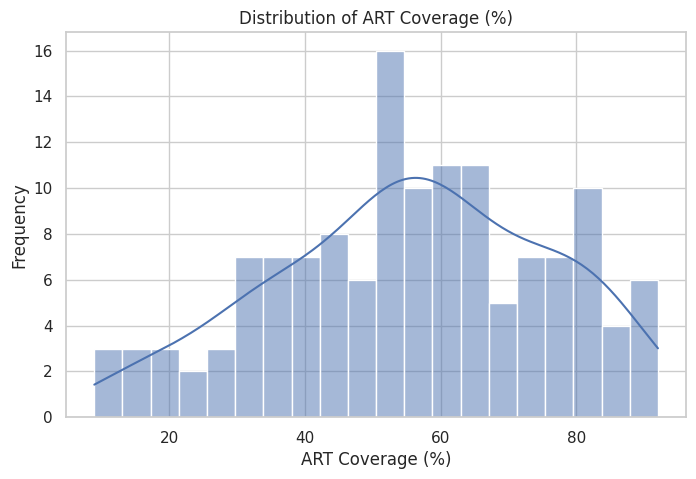

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    pd.to_numeric(
        df_art['Estimated ART coverage among people living with HIV (%)_median'],
        errors='coerce'
    ),
    bins=20,
    kde=True
)
plt.title("Distribution of ART Coverage (%)")
plt.xlabel("ART Coverage (%)")
plt.ylabel("Frequency")
plt.show()


### **Interpretation: Distribution of ART Coverage (%)**



*   This histogram shows how ART coverage percentages are distributed across countries.
*   Most countries have ART coverage in the mid-range (around 40%–70%).
*   Fewer countries fall at the very low (<20%) or very high (>80%) coverage levels.
*   The smooth KDE curve indicates a single main peak, suggesting a common coverage range for most countries.
*   The spread of values shows variation in treatment access and program effectiveness across regions.

**Key Insight**

ART coverage is moderate for most countries, but significant gaps still exist, highlighting the need to improve treatment reach in low-coverage regions.


## **2. Box Plot – People Living with HIV (Median)**

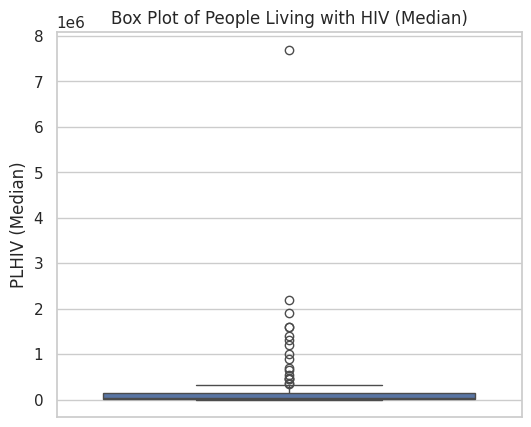

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(
    y=pd.to_numeric(
        df_art['Estimated number of people living with HIV_median'],
        errors='coerce'
    )
)
plt.title("Box Plot of People Living with HIV (Median)")
plt.ylabel("PLHIV (Median)")
plt.show()


### **Interpretation: Box Plot of People Living with HIV (Median)**


*   Most countries have relatively low median PLHIV values, as indicated by the compact box near the lower end of the scale.

*   The distribution is highly right-skewed, with several extreme outliers representing countries with very large HIV-positive populations.
*   A small number of countries account for a disproportionately high share of the global HIV burden.
*   The wide spread of outliers highlights large cross-country differences in HIV prevalence.

**Key Insight**

HIV burden is not evenly distributed across countries; instead, a few high-burden countries drive much of the global HIV population, while most countries have comparatively lower numbers.

## **3. Bar Chart – WHO Region Distribution**

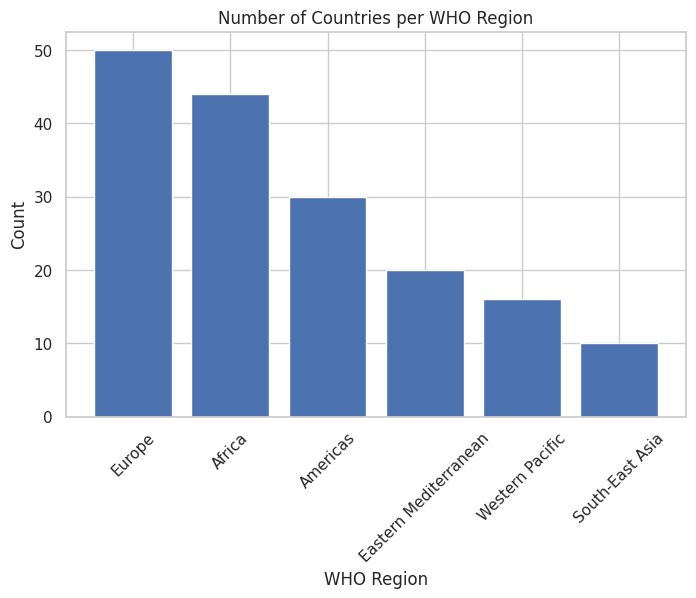

In [ ]:
region_counts = df_art['WHO Region'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(region_counts.index, region_counts.values)
plt.title("Number of Countries per WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: WHO Region Distribution**


*   The bar chart shows the number of countries represented in each WHO region
within the dataset.

*   Europe has the highest number of countries in the dataset, followed closely by Africa.
*   The Americas represent a moderate number of countries.
*   The Eastern Mediterranean and Western Pacific regions have fewer countries.
*   South-East Asia has the smallest representation in the dataset.

**Key Insight**

The dataset is regionally unbalanced, with stronger representation from Europe and Africa. This should be considered when comparing regional trends, as regions with fewer countries may have less variability and reduced influence on overall patterns.

## **4. Pie Chart – WHO Region Proportion**

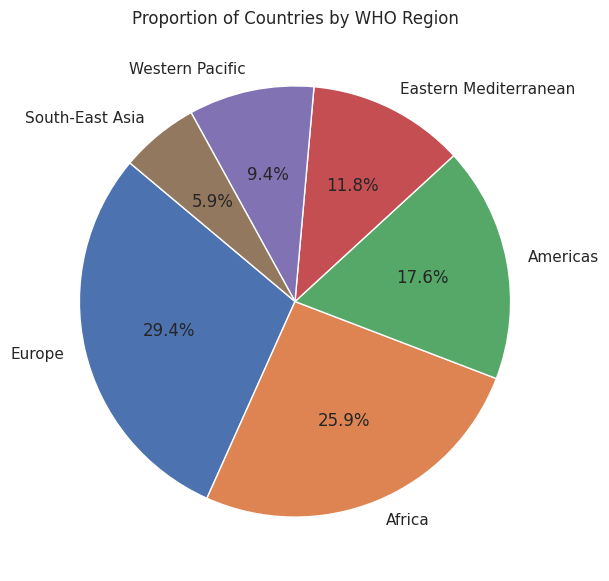

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Proportion of Countries by WHO Region")
plt.show()


## **Interpretation: Proportion of Countries by WHO Region**



* The pie chart shows the percentage distribution of countries across WHO regions in the dataset.

*   Europe accounts for the largest share, representing about 29% of all countries.
*   Africa follows closely with around 26%, indicating strong representation.
*   The Americas contribute roughly 18% of the dataset.

*   The Eastern Mediterranean and Western Pacific regions together make up about 21%.
*  South-East Asia has the smallest share, at around 6%.

**Key Insight**

The dataset is dominated by Europe and Africa, which together represent more than half of the countries. Regional comparisons should account for this imbalance, as regions with smaller representation may have less influence on overall trends.

## **5. Count Plot – WHO Region**

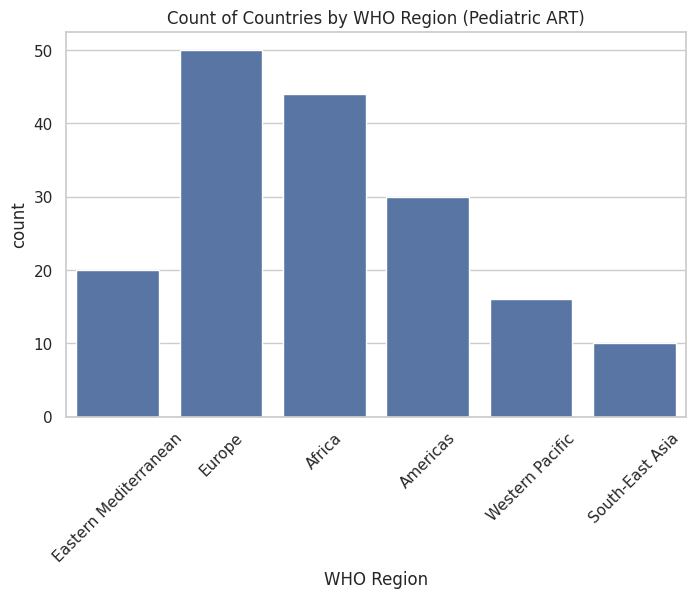

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='WHO Region', data=df_pediatric)
plt.title("Count of Countries by WHO Region (Pediatric ART)")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: Count of Countries by WHO Region (Pediatric ART)**



*   The count plot shows the number of countries reporting pediatric ART data across WHO regions.
*   Europe has the highest number of countries reporting pediatric ART data.

*   Africa also shows strong representation, reflecting the region’s high HIV burden and reporting focus.
*   The Americas have a moderate number of countries included.


*  The Eastern Mediterranean reports fewer countries.

*  The Western Pacific and South-East Asia have the lowest representation.





**Key Insight**

Pediatric ART data availability is uneven across regions, with Europe and Africa contributing most of the country-level data. Regions with fewer reporting countries may have limited visibility into pediatric HIV treatment coverage, which should be considered when interpreting regional comparisons.

## **6. Histogram – Pediatric ART Coverage (%)**

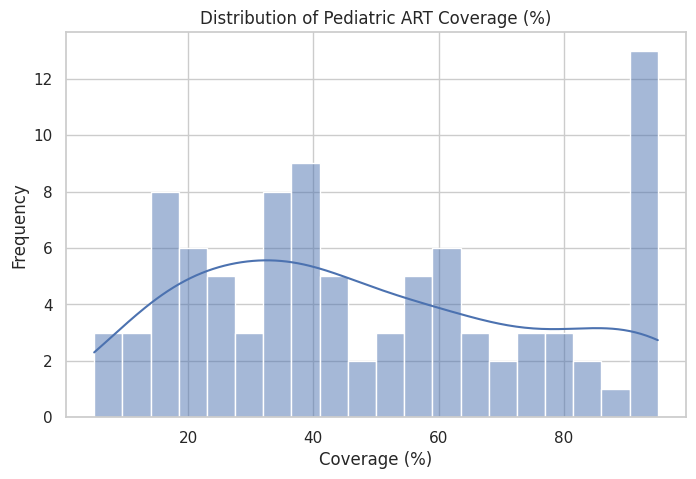

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    pd.to_numeric(
        df_pediatric['Estimated ART coverage among children (%)_median'],
        errors='coerce'
    ),
    bins=20,
    kde=True
)
plt.title("Distribution of Pediatric ART Coverage (%)")
plt.xlabel("Coverage (%)")
plt.ylabel("Frequency")
plt.show()


### **Interpretation: Distribution of Pediatric ART Coverage (%)**



*   The histogram shows how pediatric ART coverage varies across countries.
*   Pediatric ART coverage ranges widely, from below 10% to above 90%, indicating large differences in access to HIV treatment for children.
*   Most countries fall within the 20%–60% coverage range, suggesting that pediatric treatment coverage is generally lower and more uneven than adult ART coverage.
*   A smaller group of countries achieves high pediatric ART coverage (above 80%), reflecting stronger maternal and child health systems.
*   Several countries with very low coverage highlight persistent gaps in early diagnosis and treatment for children.

**key insight**

Pediatric ART coverage remains highly uneven and generally lower than adult coverage, emphasizing the need for stronger child-focused HIV treatment and early intervention programs.

## **7. Density Plot (KDE) – Adult HIV Cases (15–49)**

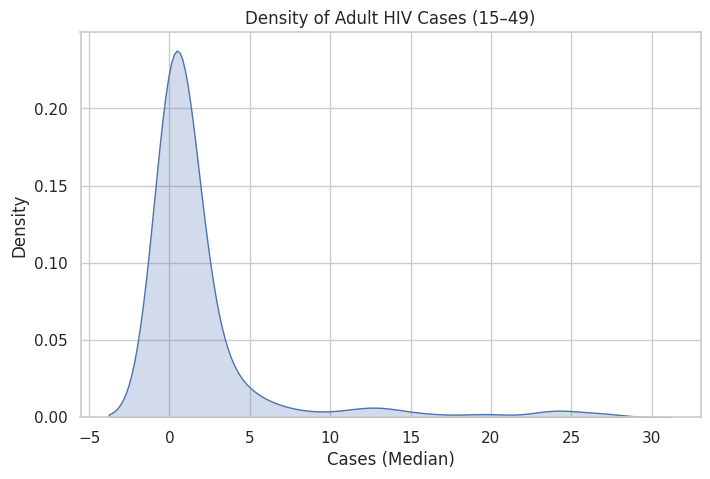

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    pd.to_numeric(df_cases['Count_median'], errors='coerce'),
    fill=True
)
plt.title("Density of Adult HIV Cases (15–49)")
plt.xlabel("Cases (Median)")
plt.show()


### **Interpretation: Density of Adult HIV Cases (15–49)**

*   The density plot shows the distribution of median adult HIV case rates (ages 15–49) across countries.
*   Most countries are concentrated at very low case values, as indicated by the sharp peak near the lower end of the distribution.
*   The distribution is strongly right-skewed, with a long tail representing countries with much higher adult HIV case rates.
*   Only a small number of countries contribute to the high-case tail, indicating concentrated epidemic hotspots.
*   The smooth density curve highlights large differences in adult HIV burden between countries.

**key insight**

Adult HIV cases are highly uneven across countries, with the majority experiencing low case rates while a few countries account for significantly higher levels, driving global variation.

## **8. Box Plot – Adult HIV Cases**

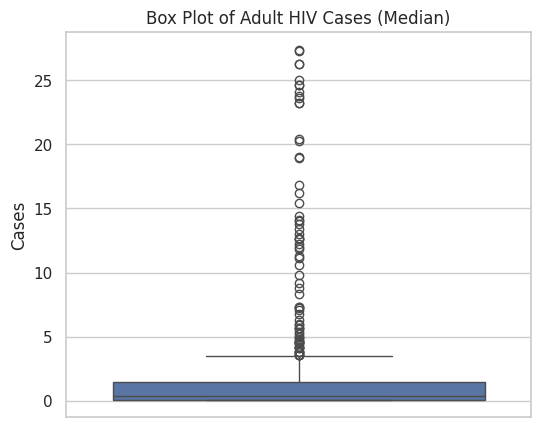

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(
    y=pd.to_numeric(df_cases['Count_median'], errors='coerce')
)
plt.title("Box Plot of Adult HIV Cases (Median)")
plt.ylabel("Cases")
plt.show()


## **Interpretation: Box Plot of Adult HIV Cases (Median)**


*   This box plot summarizes the overall distribution of median adult HIV case
counts across all observations.
*   The median value is relatively low, and the interquartile range (middle 50% of values) is tightly clustered near the lower end of the scale. This indicates that most countries report low median numbers of adult HIV cases.
*   However, the plot shows a large number of high outliers, extending far above the upper whisker. These outliers represent a small group of countries with very high HIV case burdens, which strongly skew the overall distribution.
*   The long upper tail highlights a highly right-skewed distribution, meaning that while HIV cases are low in most settings, a few high-burden countries account for a disproportionate share of adult HIV cases.

**Key Insight**

Adult HIV cases are unevenly distributed globally. Most countries experience relatively low case counts, but a limited number of high-burden countries—primarily in specific regions—drive the global HIV epidemic. This emphasizes the importance of targeted interventions focused on these high-burden settings to achieve meaningful global reductions.

## **9. Histogram – HIV Deaths (Median)**

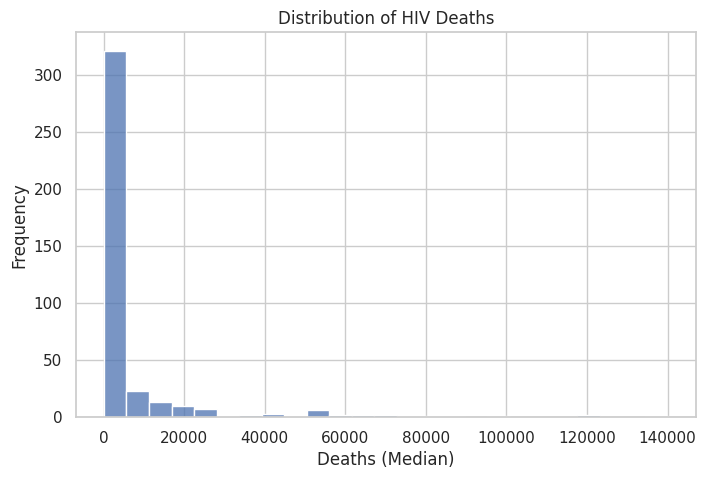

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    pd.to_numeric(df_deaths['Count_median'], errors='coerce'),
    bins=25
)
plt.title("Distribution of HIV Deaths")
plt.xlabel("Deaths (Median)")
plt.ylabel("Frequency")
plt.show()


**Interpretation: Histogram of HIV Deaths (Median)**



*   This histogram shows the distribution of median HIV-related deaths across all observations.
*   Most of the bars are heavily concentrated near the lower end of the x-axis, indicating that the majority of countries report relatively low numbers of HIV deaths. This suggests that in many settings, HIV-related mortality is comparatively limited or well-controlled.
*   However, the distribution has a long right tail, with a small number of observations showing very high death counts. These extreme values represent high-burden countries, where HIV continues to cause substantial mortality.
*   Overall, the shape of the histogram is strongly right-skewed, meaning that while low death counts are common, a few countries account for a disproportionately large share of HIV-related deaths.

**Key Insight**

HIV-related deaths are unevenly distributed globally. Most countries experience low mortality, but a small number of high-burden settings drive global HIV deaths. This highlights the importance of focused mortality-reduction efforts, particularly in countries with persistently high HIV-related death counts.

## **10. Density Plot – People Living with HIV**

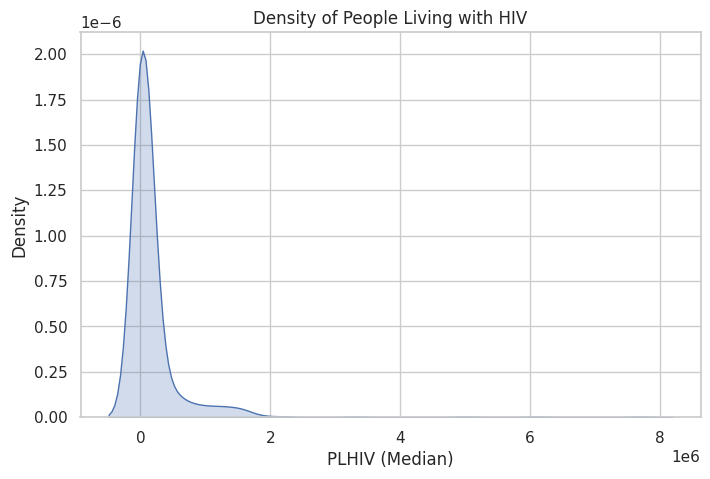

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    pd.to_numeric(df_plhiv['Count_median'], errors='coerce'),
    fill=True
)
plt.title("Density of People Living with HIV")
plt.xlabel("PLHIV (Median)")
plt.show()


**Interpretation: Density Plot of People Living with HIV (PLHIV)**


*   This density plot shows how the median number of people living with HIV (PLHIV) is distributed across countries.
*   The density is highly concentrated near the lower end of the x-axis, indicating that most countries have relatively small PLHIV populations. This reflects the fact that in many countries, HIV affects a limited portion of the population.
*   The plot has a long right tail, extending toward very high PLHIV values. This shows that a small number of countries have extremely large HIV-positive populations, which significantly influence the global distribution.
*   Overall, the distribution is strongly right-skewed, meaning that while low PLHIV counts are common, a few high-burden countries dominate the total number of people living with HIV worldwide.

**Key Insight**

The global HIV burden is highly uneven. Most countries have relatively low numbers of people living with HIV, but a small group of high-burden countries accounts for the majority of PLHIV. Targeted prevention and treatment efforts in these high-burden settings are essential for meaningful global impact.

## **11. Histogram – PMTCT Coverage (%)**

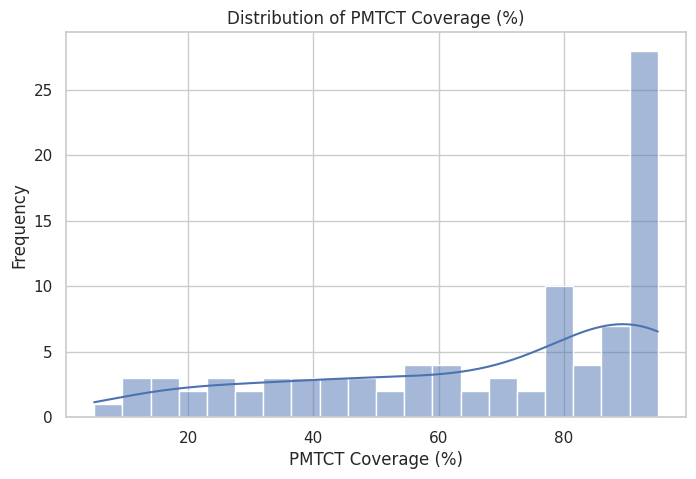

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    pd.to_numeric(
        df_pmtct['Percentage Recieved_median'],
        errors='coerce'
    ),
    bins=20,
    kde=True
)
plt.title("Distribution of PMTCT Coverage (%)")
plt.xlabel("PMTCT Coverage (%)")
plt.ylabel("Frequency")
plt.show()


**Interpretation: Histogram of PMTCT Coverage (%)**

*   This histogram illustrates the distribution of PMTCT (Prevention of Mother-to-Child Transmission) coverage percentages across countries.

*   Most observations are concentrated at the higher end of the scale (around 70–95%), indicating that many countries have achieved high PMTCT coverage. This suggests strong global progress in preventing HIV transmission from mothers to children, particularly in countries with well-established maternal health and HIV programs.
*   At the same time, there is a long spread toward lower coverage values, with some countries falling below 40%. These lower values highlight persistent gaps in PMTCT service access and utilization, especially in resource-limited or high-burden settings.
*   The distribution is left-skewed (negatively skewed), meaning high coverage is common, but a smaller group of countries still lags significantly behind.

**Key Insight**

While global PMTCT coverage is generally high, progress is uneven. A subset of countries continues to experience low coverage, emphasizing the need for targeted maternal HIV interventions to ensure universal access and eliminate new pediatric HIV infections.

## **12. Box Plot – Needing Antiretrovirals (Median)**



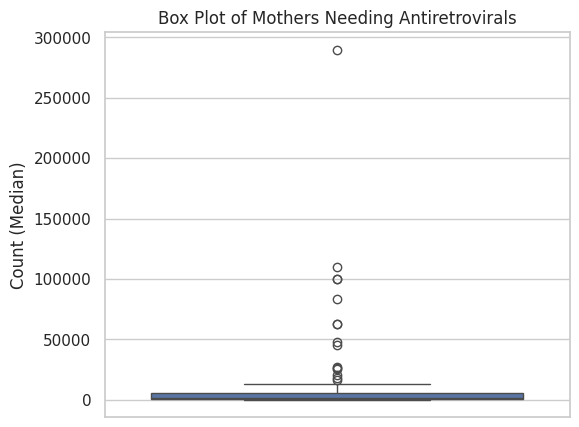

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(
    y=pd.to_numeric(
        df_pmtct['Needing antiretrovirals_median'],
        errors='coerce'
    )
)
plt.title("Box Plot of Mothers Needing Antiretrovirals")
plt.ylabel("Count (Median)")
plt.show()


**Interpretation: Box Plot of Mothers Needing Antiretrovirals (Median)**



*   This box plot shows the distribution of the median number of mothers needing antiretroviral treatment across countries.
*   The median value is relatively low, and most of the data points are concentrated near the lower end of the scale. This indicates that many countries have a small to moderate number of mothers requiring antiretroviral therapy, likely reflecting lower HIV prevalence among pregnant women or effective prevention programs.
*  However, the plot reveals several extreme outliers, with some countries reporting very high numbers of mothers needing antiretrovirals. These outliers suggest the presence of high-burden settings, where maternal HIV prevalence remains substantial.
*   The distribution is strongly right-skewed, meaning a small number of countries account for a disproportionately large share of mothers needing treatment.

**Key Insight**

Most countries face relatively manageable maternal HIV treatment needs, but a limited number of high-burden countries drive the global demand for antiretrovirals among mothers. Targeted PMTCT and maternal HIV interventions in these settings are crucial to reduce both maternal treatment needs and mother-to-child HIV transmission.

# **2️⃣ BIVARIATE VISUALIZATIONS (Two Variables)**

Used to analyze relationships or comparisons between two variables.

## **1. ART Coverage vs People Living with HIV (Scatter Plot)**

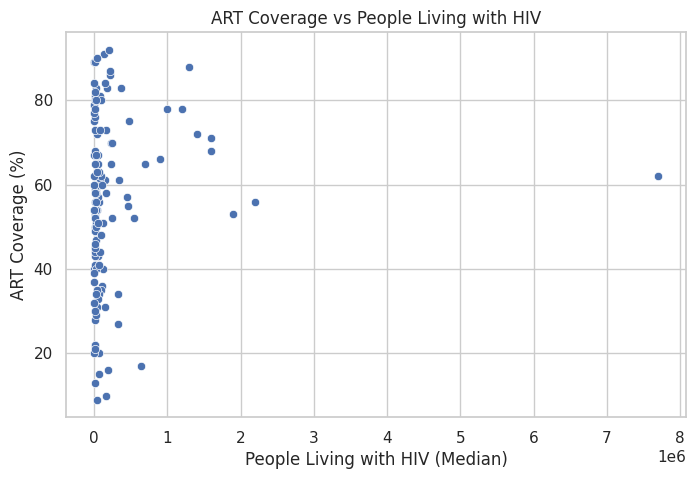

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Estimated number of people living with HIV_median',
    y='Estimated ART coverage among people living with HIV (%)_median',
    data=df_art
)
plt.title("ART Coverage vs People Living with HIV")
plt.xlabel("People Living with HIV (Median)")
plt.ylabel("ART Coverage (%)")
plt.show()


### **Interpretation: ART Coverage vs People Living with HIV**

*   The scatter plot shows the relationship between the number of people living with HIV (PLHIV) and ART coverage (%) across countries.
*   There is no strong linear relationship between HIV burden and ART coverage.
*   Countries with low PLHIV counts display a wide range of ART coverage, from very low to very high.
*   Some high-burden countries achieve moderate to high ART coverage, indicating effective treatment scale-up despite large case numbers.
* A few outliers with extremely high PLHIV highlight the challenges of maintaining high coverage in large populations.  


**Key Insight**

ART coverage depends more on health system capacity and policy response than on the size of the HIV-positive population alone. High disease burden does not automatically imply low treatment coverage.

## **2. ART Coverage by WHO Region (Box Plot)**

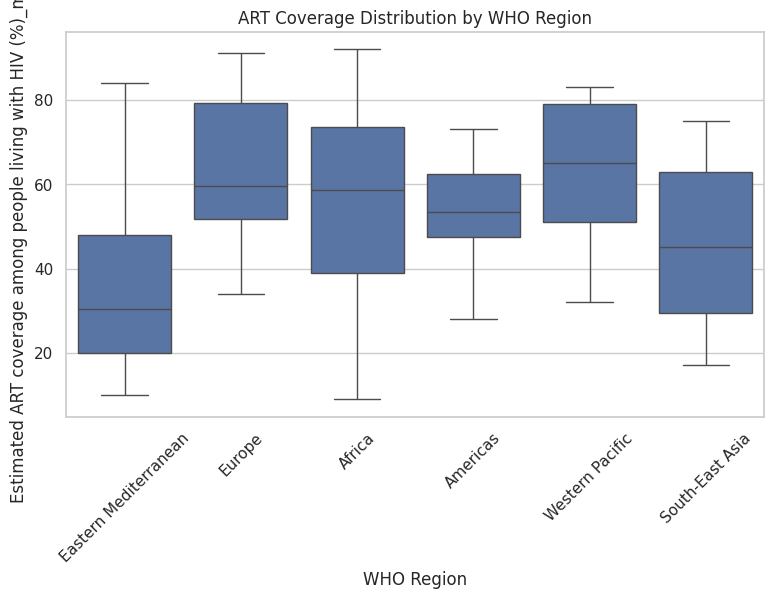

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(
    x='WHO Region',
    y='Estimated ART coverage among people living with HIV (%)_median',
    data=df_art
)
plt.title("ART Coverage Distribution by WHO Region")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: ART Coverage Distribution by WHO Region**

*   The box plot compares ART coverage (%) among people living with HIV across WHO regions.
*   Europe and Western Pacific regions show higher median ART coverage, indicating stronger treatment access.

*   Africa displays a wide spread, suggesting large differences in ART coverage between countries.
*   The Eastern Mediterranean region has a lower median coverage, with many countries below the global average.

*   Americas and South-East Asia fall in the mid-range, with moderate coverage and some variability.

**Key Insight**

ART coverage varies significantly by region, reflecting inequalities in healthcare access, funding, and HIV response capacity across different parts of the world.

## **3. ART Recipients vs HIV Population (Scatter)**

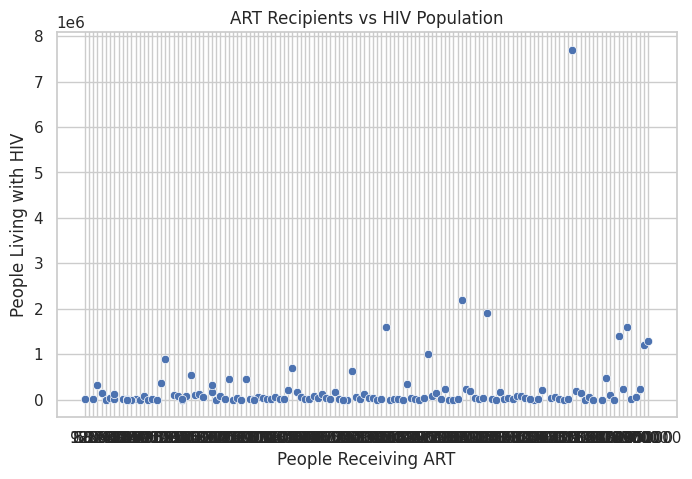

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Reported number of people receiving ART',
    y='Estimated number of people living with HIV_median',
    data=df_art
)
plt.title("ART Recipients vs HIV Population")
plt.xlabel("People Receiving ART")
plt.ylabel("People Living with HIV")
plt.show()


### **Interpretation: ART Recipients vs HIV Population**

*   This scatter plot shows the relationship between the number of people receiving ART and the total number of people living with HIV.
*  Countries with larger HIV populations generally have more people on ART.
*   Most countries are clustered at lower values, indicating smaller HIV burdens and fewer ART recipients.
*   A few outliers represent countries with very large HIV populations and high ART uptake.
*   The spread of points suggests that ART coverage levels differ across countries, even with similar HIV population sizes.

**Key Insight**

While ART enrollment increases with HIV population size, treatment coverage is not uniform, highlighting differences in healthcare access and program effectiveness across countries.

## **4. Adult HIV Cases by Year (Line Plot)**

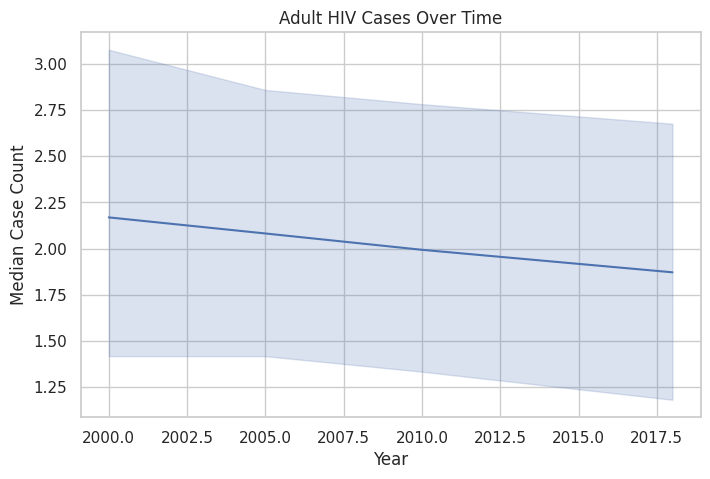

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(
    x='Year',
    y='Count_median',
    data=df_cases
)
plt.title("Adult HIV Cases Over Time")
plt.ylabel("Median Case Count")
plt.show()


## **Interpretation: Adult HIV Cases by Year (Line Plot)**

*  This line plot illustrates the trend in the median number of adult HIV cases over time.

*   The median adult HIV case count shows a gradual downward trend across the years, indicating a steady decline in reported cases.

*   In the early years, the median case count is relatively higher, after which it consistently decreases, suggesting improvements over time.

*   The shaded confidence interval around the line indicates variation in case counts, but the overall direction remains downward.
*  Despite some variability, there are no sharp spikes or sudden increases, implying a stable and controlled trend rather than abrupt outbreaks.


*  The declining pattern may reflect the impact of public health interventions, increased awareness, improved prevention strategies, and wider access to testing and treatment.




**Key Insight**

The consistent decrease in median adult HIV cases over the years suggests progress in HIV prevention and control efforts. While variations exist, the overall trend points toward improved management of HIV among the adult population over time.

## **5. Average ART Coverage by WHO Region (bar chart)**

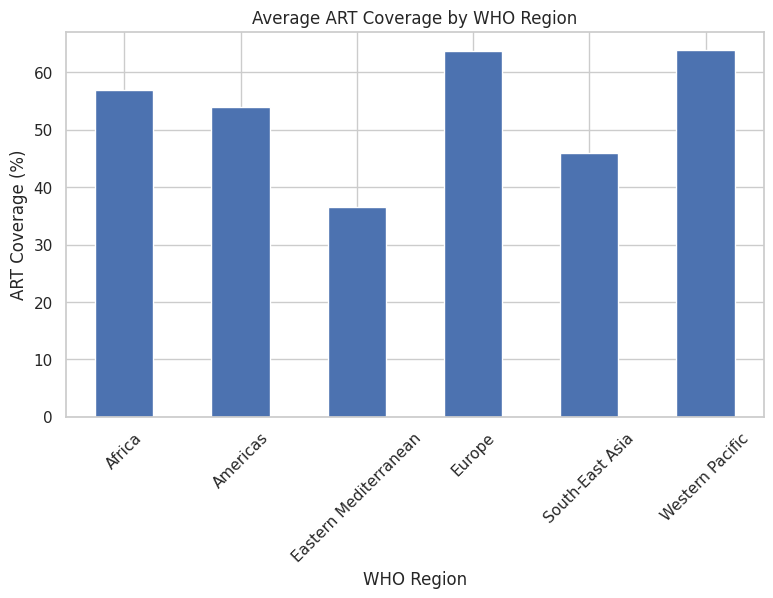

In [ ]:
region_avg = df_art.groupby('WHO Region')['Estimated ART coverage among people living with HIV (%)_median'].mean()

plt.figure(figsize=(9,5))
region_avg.plot(kind='bar')
plt.title("Average ART Coverage by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("ART Coverage (%)")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: Average ART Coverage by WHO Region (Bar Chart)**


*   This bar chart compares the average Antiretroviral Therapy (ART) coverage among people living with HIV across different WHO regions.
*   Europe and the Western Pacific regions show the highest average ART coverage, indicating relatively strong healthcare systems, better treatment access, and effective HIV treatment programs.
*   The African region also demonstrates moderately high ART coverage, which is notable given its larger HIV burden, suggesting significant progress through international funding and large-scale HIV interventions.
*   The Americas have comparable ART coverage to Africa, reflecting fairly consistent treatment availability across many countries in the region.

*  South-East Asia shows lower ART coverage compared to Europe and the Western Pacific, pointing to challenges such as uneven healthcare access, population size, and resource constraints.
*   The Eastern Mediterranean region has the lowest average ART coverage, highlighting gaps in HIV treatment access, possible stigma, conflict-related health system disruptions, and limited program reach.

**Key Insight**

ART coverage varies substantially across WHO regions. Regions with stronger health infrastructure and sustained HIV programs achieve higher coverage, while regions facing economic, political, or systemic challenges lag behind. This underscores the need for region-specific strategies to improve ART access and equity worldwide.

## **6. Distribution of ART Coverage by Region(Violin Plot)**

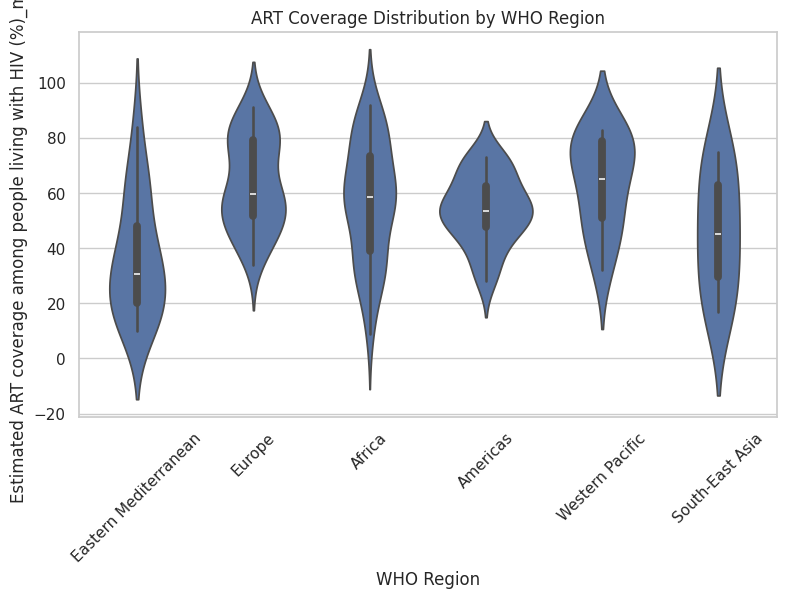

In [ ]:
plt.figure(figsize=(9,5))
sns.violinplot(
    x='WHO Region',
    y='Estimated ART coverage among people living with HIV (%)_median',
    data=df_art
)
plt.title("ART Coverage Distribution by WHO Region")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: Distribution of ART Coverage by WHO Region (Violin Plot)**


*   This violin plot illustrates the distribution, spread, and central tendency of ART coverage among people living with HIV across different WHO regions.
*  The Eastern Mediterranean region shows a low median ART coverage with a wide spread, indicating generally poor treatment coverage and substantial variability among countries.
*   Europe displays a high median ART coverage with a relatively concentrated distribution, suggesting consistently strong and uniform ART access across countries in the region.

*   Africa shows a broad distribution, reflecting significant differences in ART coverage between countries—some with very high coverage and others still lagging behind.
*   The Americas have a moderate median coverage with a narrower spread compared to Africa, indicating more consistent ART access across countries.
*   The Western Pacific region demonstrates a high median ART coverage but with noticeable variability, suggesting overall strong programs alongside regional disparities.


*   South-East Asia shows a lower-to-moderate median with a wide spread, highlighting uneven ART coverage and differences in healthcare access within the region.

**Key Insight**

While some regions (Europe and Western Pacific) achieve high and relatively consistent ART coverage, others (Africa, South-East Asia, and Eastern Mediterranean) exhibit wide disparities. This emphasizes that average values alone can mask inequalities, and targeted, country-specific interventions are crucial to improving equitable ART access across regions.

## **7. ART Coverage Spread by WHO Region (Swarm Plot)**

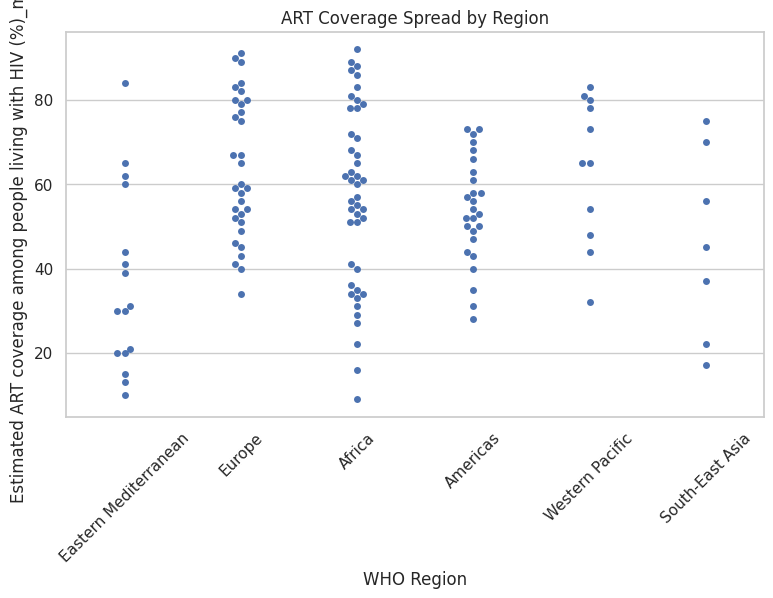

In [ ]:
plt.figure(figsize=(9,5))
sns.swarmplot(
    x='WHO Region',
    y='Estimated ART coverage among people living with HIV (%)_median',
    data=df_art
)
plt.title("ART Coverage Spread by Region")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: ART Coverage Spread by WHO Region (Swarm Plot)**

This swarm plot displays the distribution and clustering of individual country-level ART coverage values across WHO regions, allowing a detailed view of variability and outliers.

The Eastern Mediterranean region shows most data points concentrated at lower ART coverage levels, with only a few countries achieving higher coverage. This indicates generally limited ART access across the region.

Europe has a dense cluster of points at higher ART coverage values, suggesting that most countries in this region consistently achieve strong ART uptake, with relatively few low-coverage outliers.

Africa exhibits the widest spread of data points, ranging from very low to very high ART coverage. This highlights major inequalities between countries, reflecting differences in healthcare infrastructure, funding, and program effectiveness.

The Americas show a moderate and relatively compact distribution, indicating more uniform ART coverage compared to Africa, though some variability still exists.

The Western Pacific region clusters largely at higher coverage levels, but with some mid-range values, suggesting overall good performance with certain disparities.

South-East Asia displays a mixed spread, with several countries at low-to-moderate coverage and fewer at high coverage, pointing to uneven ART access within the region.

**Key Insight**

The swarm plot reveals that regional averages mask substantial country-level differences, especially in Africa and South-East Asia. While Europe and the Western Pacific demonstrate consistently high ART coverage, targeted interventions are needed in regions with wide spreads and low-performing countries to achieve more equitable ART access globally.

## **8. Average HIV Deaths by WHO Region (Bar Plot)**

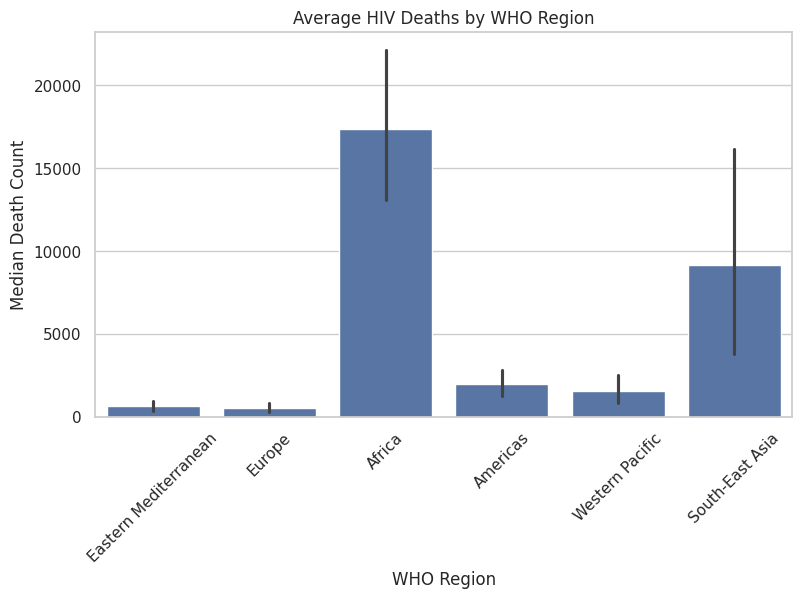

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(
    x='WHO Region',
    y='Count_median',
    data=df_deaths
)
plt.title("Average HIV Deaths by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Median Death Count")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: Average HIV Deaths by WHO Region (Bar Plot)**

This bar plot compares the average (median) number of HIV-related deaths across different WHO regions.

Africa records by far the highest median HIV death count, reflecting the region’s high HIV burden, late diagnosis in some settings, and uneven access to sustained ART despite recent improvements.

South-East Asia has the second-highest median death count, indicating a significant HIV impact combined with gaps in early detection and consistent treatment coverage in parts of the region.

The Americas and Western Pacific regions show moderate death counts, suggesting better overall HIV management compared to Africa and South-East Asia, but with persistent challenges in certain countries.

Europe reports a low median number of HIV deaths, likely due to early diagnosis, strong healthcare systems, and widespread access to effective ART.

The Eastern Mediterranean region also shows relatively low death counts, though this may partly reflect underreporting or lower diagnosed case numbers in some countries.

**Key Insight**

HIV-related deaths are unevenly distributed across regions, closely mirroring differences in HIV prevalence, healthcare infrastructure, and ART coverage. Regions with higher ART access and stronger health systems tend to have significantly lower mortality, underscoring the life-saving impact of timely and sustained HIV treatment programs.

## **9.Distribution of People Living with HIV by Region(Density Plot)**

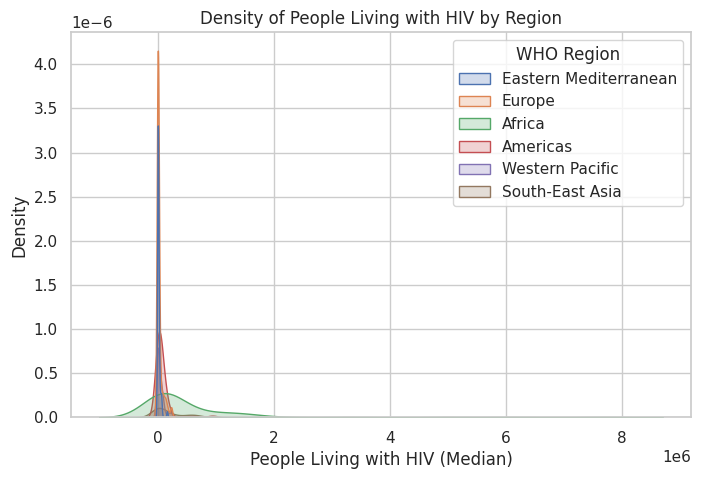

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df_plhiv,
    x='Count_median',
    hue='WHO Region',
    fill=True
)
plt.title("Density of People Living with HIV by Region")
plt.xlabel("People Living with HIV (Median)")
plt.show()


### **Interpretation: Distribution of People Living with HIV by Region (Density Plot)**

This density (KDE) plot compares the distribution of the median number of people living with HIV (PLHIV) across WHO regions, highlighting differences in burden and spread.

The African region shows a broad and right-skewed density, extending to much higher values than other regions. This indicates that many countries in Africa have a large HIV burden, with substantial variation across countries.

South-East Asia also exhibits a right-skewed distribution, though less extreme than Africa, suggesting a significant but more moderate HIV burden across countries in the region.

The Americas display a moderate distribution, with most countries clustered at lower-to-middle PLHIV values, reflecting fewer high-burden countries compared to Africa.

Europe and the Western Pacific show narrow, sharply peaked densities at lower values, indicating that most countries in these regions have relatively smaller HIV populations and less variability.

The Eastern Mediterranean region has the lowest and most concentrated distribution, suggesting comparatively fewer people living with HIV in most countries.

**Key Insight**

The density plot highlights strong regional disparities in HIV burden. Africa bears the largest and most uneven share of people living with HIV, while Europe, Western Pacific, and Eastern Mediterranean regions have lower and more concentrated burdens. This underscores the need for resource allocation and intervention strategies proportional to regional HIV burden, particularly in high-density regions.

## **10. Correlation: HIV Population vs Deaths (Heat Map)**

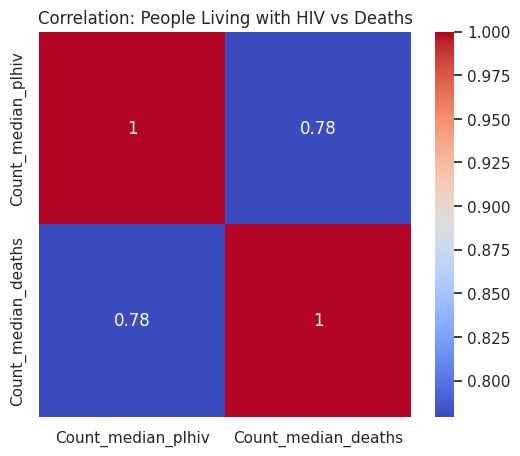

In [ ]:
merged_df = pd.merge(
    df_plhiv[['Country', 'Year', 'Count_median']],
    df_deaths[['Country', 'Year', 'Count_median']],
    on=['Country', 'Year'],
    suffixes=('_plhiv', '_deaths')
)

corr_df = merged_df[['Count_median_plhiv', 'Count_median_deaths']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title("Correlation: People Living with HIV vs Deaths")
plt.show()


### **Interpretation: Correlation between People Living with HIV and HIV-Related Deaths (Heat Map)**

This heat map displays the correlation between the median number of people living with HIV (PLHIV) and the median number of HIV-related deaths across countries and years.

The correlation coefficient of 0.78 indicates a strong positive relationship between HIV population size and HIV-related deaths.

This means that countries with larger numbers of people living with HIV generally experience higher numbers of HIV-related deaths.

The deep color intensity reinforces the strength of this association, showing that the relationship is not weak or random.

However, the correlation is not perfect (not close to 1), suggesting that other factors—such as ART coverage, healthcare quality, early diagnosis, and treatment adherence—play a significant role in reducing deaths even in high HIV-burden countries.

**Key Insight**

While a larger HIV population is strongly associated with higher HIV-related deaths, the relationship is moderated by access to effective treatment and healthcare systems. Improving ART coverage and continuity of care can substantially reduce mortality, even in countries with a high number of people living with HIV.

## **11. PMTCT Coverage by WHO Region (Swarm Plot)**

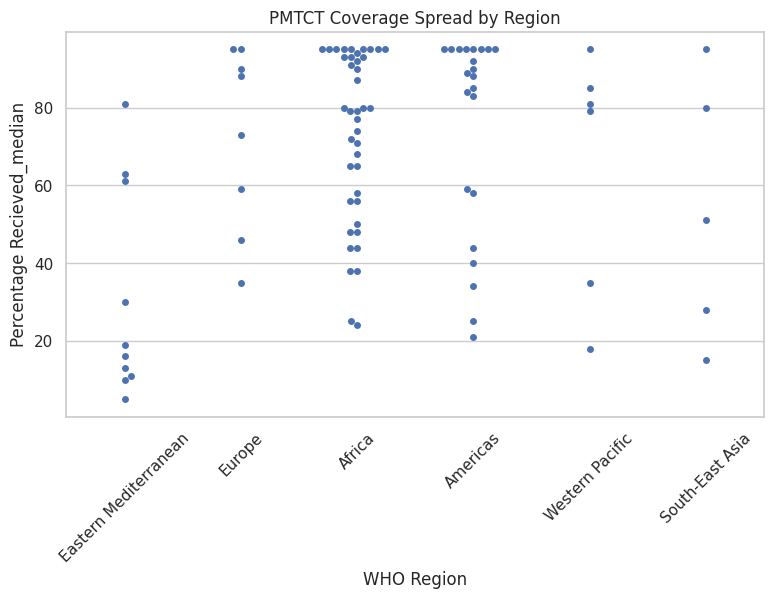

In [ ]:
plt.figure(figsize=(9,5))
sns.swarmplot(
    x='WHO Region',
    y='Percentage Recieved_median',
    data=df_pmtct
)
plt.title("PMTCT Coverage Spread by Region")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: PMTCT Coverage by WHO Region (Swarm Plot)**

This swarm plot shows the spread and clustering of Prevention of Mother-to-Child Transmission (PMTCT) coverage across WHO regions, based on median percentage received.

The Eastern Mediterranean region has many countries clustered at low PMTCT coverage levels, with only a few achieving high coverage. This suggests limited access to PMTCT services and possible gaps in maternal HIV care.

Europe displays a strong concentration of countries at high PMTCT coverage (around 80–95%), indicating well-established maternal health systems and effective integration of PMTCT programs.

Africa shows the widest spread, ranging from low to very high PMTCT coverage. This highlights substantial inequality—some countries have achieved near-universal PMTCT coverage, while others continue to face major service gaps.

The Americas exhibit a moderate-to-high coverage cluster, though with noticeable variability, suggesting generally good access with remaining disparities across countries.

The Western Pacific region mostly clusters at higher coverage levels, but a few lower values indicate uneven progress across countries.

South-East Asia shows a mixed pattern, with countries distributed from low to high coverage, reflecting uneven PMTCT implementation and access within the region.

**Key Insight**

PMTCT coverage varies widely both between and within regions. While Europe and parts of the Western Pacific demonstrate consistently high coverage, Africa and South-East Asia reveal significant disparities. Strengthening maternal healthcare systems and targeted PMTCT interventions is essential to reduce new pediatric HIV infections globally.


## 12.Average People Living with HIV Over Time (Line Plot )

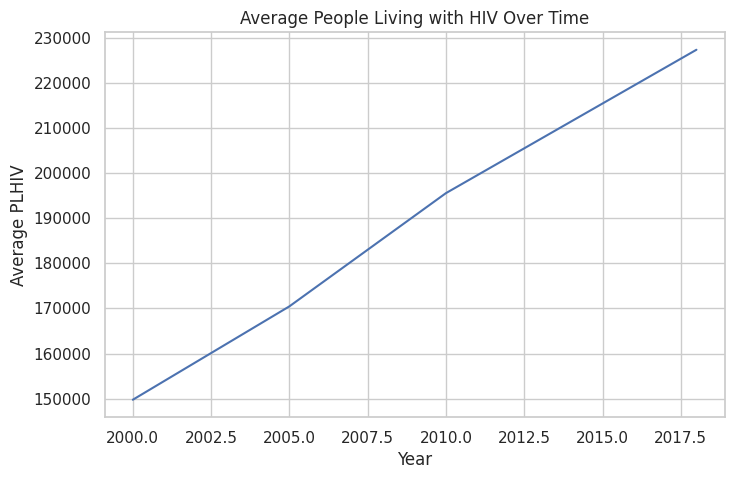

In [ ]:
avg_plhiv = df_plhiv.groupby('Year')['Count_median'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_plhiv.index, avg_plhiv.values)
plt.title("Average People Living with HIV Over Time")
plt.xlabel("Year")
plt.ylabel("Average PLHIV")
plt.show()


### **Interpretation: Average People Living with HIV Over Time (Line Plot)**

This line plot illustrates the trend in the average number of people living with HIV (PLHIV) over time, calculated as the yearly mean of median counts across observations.

From 2000 onward, the chart shows a consistent and steady increase in average PLHIV. Around 2000, the average count is approximately 150,000, rising gradually through the early 2000s. This sustained upward trend continues across the entire period, reaching over 225,000 by 2018.

The sharpest growth appears between 2005 and 2010, suggesting a period where either HIV prevalence increased, survival rates improved due to expanded access to antiretroviral therapy (ART), or both. After 2010, the trend continues upward but at a slightly more moderate and stable pace, indicating ongoing accumulation of people living with HIV rather than sudden spikes.

Importantly, the absence of major declines suggests that while new infections may be stabilizing or reducing in some regions, improved treatment and longevity mean more people are living longer with HIV, increasing the overall PLHIV population.

**Key Insight**

The steadily rising average PLHIV over time reflects the dual reality of the HIV epidemic: progress in treatment and survival alongside the continued public health burden of HIV. This trend underscores the need for sustained long-term investments in HIV care, treatment access, and prevention strategies to manage both existing and future cases effectively.

# **3️⃣ MULTIVARIATE VISUALIZATIONS (More Than Two Variables)**

Used to analyze complex relationships involving multiple variables.

## **1. Scatter Plot (Color = WHO Region, Size = PLHIV)**

Variables: ART Coverage, Reported ART, WHO Region, PLHIV

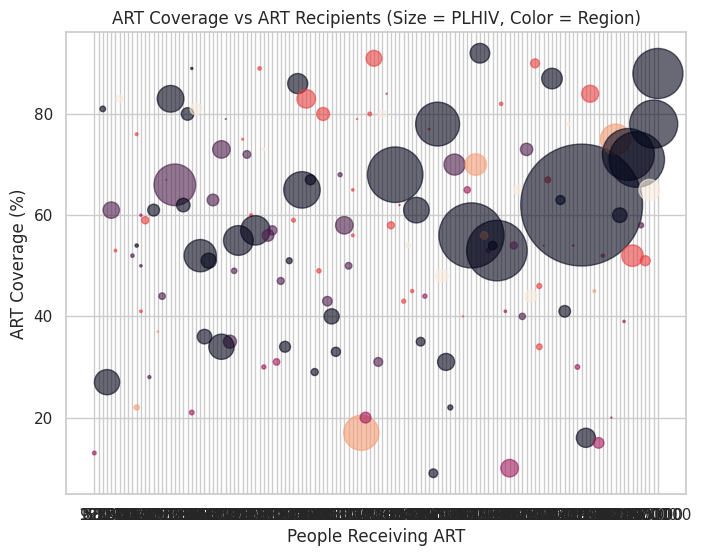

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_art['Reported number of people receiving ART'],
    df_art['Estimated ART coverage among people living with HIV (%)_median'],
    c=pd.Categorical(df_art['WHO Region']).codes,
    s=df_art['Estimated number of people living with HIV_median'] / 1000,
    alpha=0.6
)
plt.xlabel("People Receiving ART")
plt.ylabel("ART Coverage (%)")
plt.title("ART Coverage vs ART Recipients (Size = PLHIV, Color = Region)")
plt.show()


### **Interpretation: ART Coverage vs. People Receiving ART**

(Scatter Plot | Size = PLHIV, Color = WHO Region)



*   This scatter plot examines the relationship between the number of people receiving antiretroviral therapy (ART) and ART coverage (%), with bubble size representing the estimated number of people living with HIV (PLHIV) and color indicating WHO regions.
*   Overall, the plot reveals a weak to moderate positive association between the number of people receiving ART and ART coverage. Countries with higher ART recipient counts often—but not always—achieve higher coverage, indicating that absolute treatment numbers do not directly translate into proportional population coverage.
*   Countries with large PLHIV populations (larger bubbles) are mostly concentrated toward the right side of the plot, reflecting higher numbers of people on ART. However, these large-burden countries display wide variation in ART coverage, ranging from low to high levels. This suggests that scaling up treatment in high-burden settings remains uneven and strongly influenced by health system capacity and program effectiveness.

*   Regional patterns are clearly visible through color clustering. Some regions show tight clusters at higher ART coverage levels (around 70–90%), indicating relatively successful ART scale-up and retention. In contrast, other regions are more dispersed across the coverage spectrum, with several countries remaining below 50% coverage despite having substantial numbers of people on treatment.
*   Notably, several countries with lower numbers of ART recipients still achieve high ART coverage, implying smaller HIV epidemics paired with effective treatment outreach. Conversely, some countries with many people on ART remain at moderate or low coverage, highlighting the challenge of reaching all PLHIV in large or resource-constrained settings.

**Key Insight**

ART coverage is not solely driven by the number of people receiving treatment but by how effectively ART programs reach the entire PLHIV population. Large HIV-burden countries face the greatest challenges, showing substantial variability in coverage despite high ART enrollment. Targeted regional strategies, health system strengthening, and focused interventions in high-PLHIV settings are essential to close remaining ART coverage gaps and move toward universal treatment access.

## **2. Multi-Line Chart (Region-wise ART Coverage Trends)**

Variables: Country, ART Coverage, WHO Region

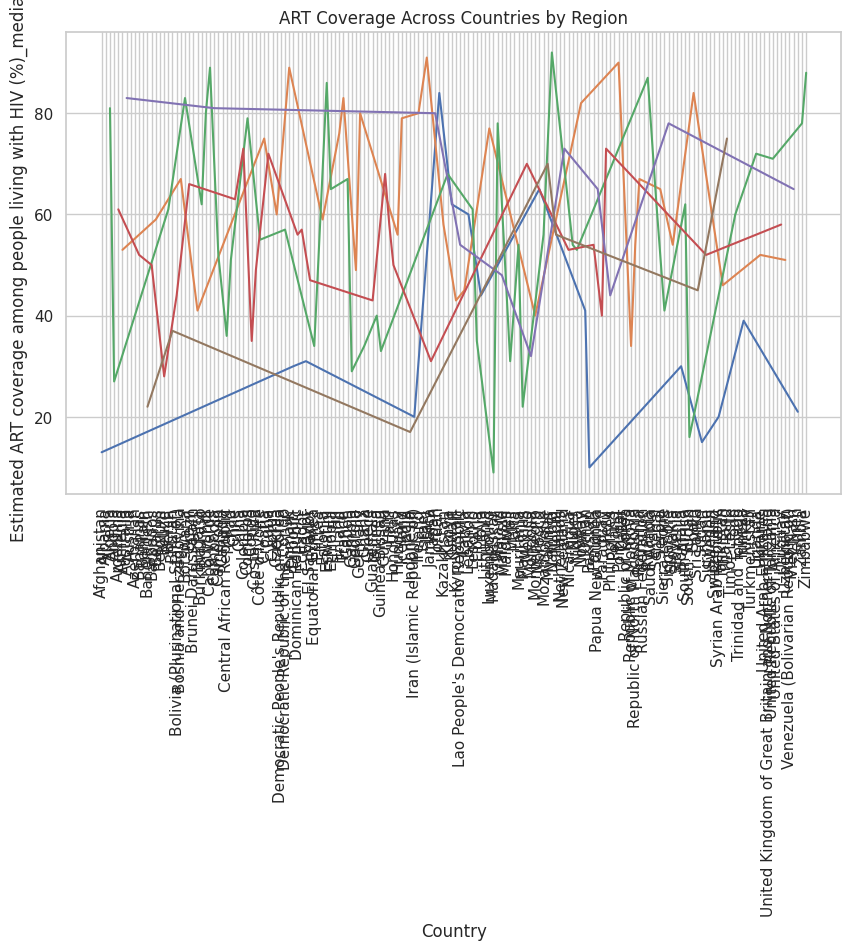

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_art,
    x='Country',
    y='Estimated ART coverage among people living with HIV (%)_median',
    hue='WHO Region',
    legend=False
)
plt.title("ART Coverage Across Countries by Region")
plt.xticks(rotation=90)
plt.show()


### **Interpretation: ART Coverage Across Countries by Region (Multi-Line Chart)**

This multi-line chart compares ART coverage (%) across countries, grouped by WHO region.

Overall, ART coverage varies widely between countries within the same region, showing that regional averages can hide large national differences. Some countries achieve high coverage (above 80–90%), while others remain below 30%, even within the same region.

Regions such as Europe and the Americas generally show higher and more consistent ART coverage, with many countries clustered at moderate to high levels. This suggests stronger health systems and better access to HIV treatment services.

In contrast, Africa and South-East Asia display the greatest fluctuations, with sharp rises and drops between neighboring countries. This indicates uneven ART implementation, where some countries have scaled up treatment effectively while others continue to face access and coverage challenges.

The Western Pacific and Eastern Mediterranean regions fall in between, showing a mix of moderate and high coverage but with noticeable country-level variability.

**Key Insight**

ART coverage is highly country-specific, even within the same WHO region. While some regions perform better overall, significant disparities remain. Strengthening national HIV programs and sharing best practices across countries within regions are crucial to achieving more uniform and equitable ART coverage.

## **3. Heatmap – Correlation (Multiple Numeric Variables)**

Variables: ART, PLHIV, Coverage

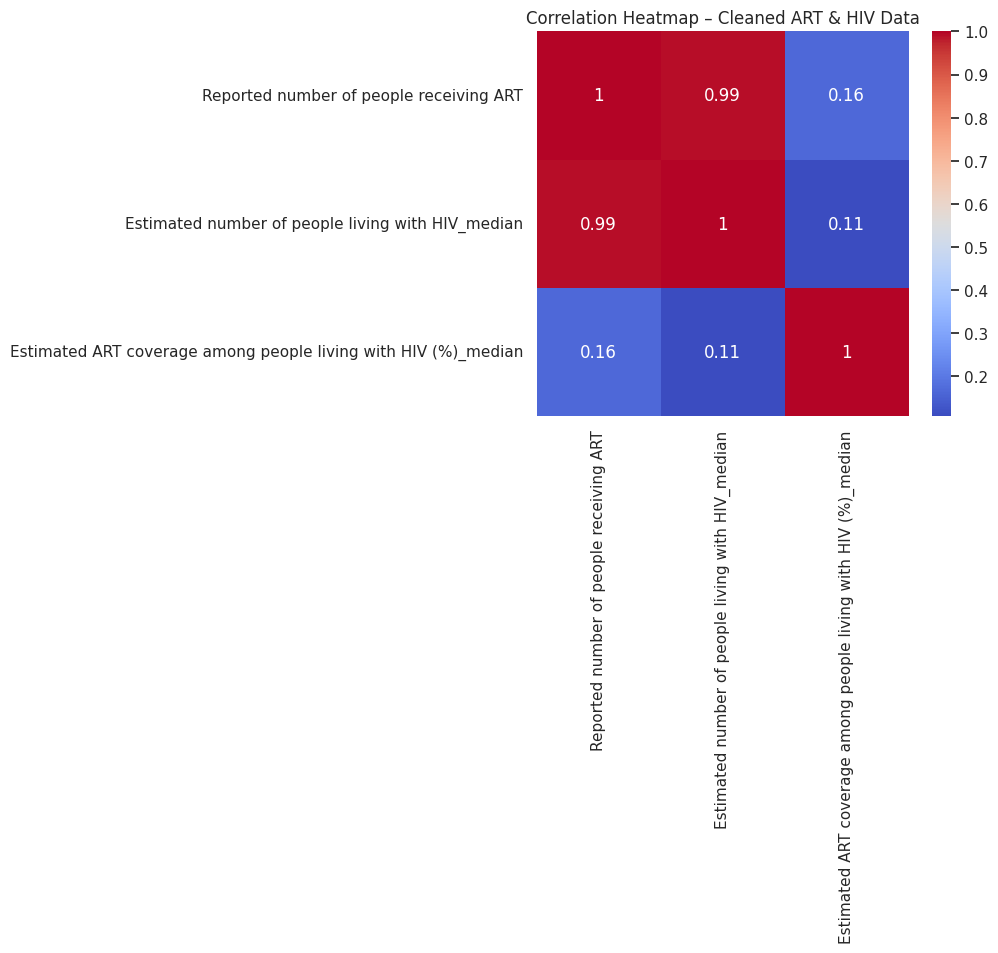

In [ ]:
df_clean = df_art[cols].apply(pd.to_numeric, errors='coerce').dropna()

corr = df_clean.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap – Cleaned ART & HIV Data")
plt.show()


### **Interpretation: Correlation Heatmap – ART, PLHIV, and ART Coverage**

This correlation heatmap shows the strength and direction of relationships between three key HIV-related variables: people receiving ART, people living with HIV (PLHIV), and ART coverage (%).

There is a very strong positive correlation (≈ 0.99) between the reported number of people receiving ART and the estimated number of people living with HIV. This indicates that countries with larger HIV burdens naturally have more people on ART, reflecting scale rather than treatment effectiveness.

In contrast, ART coverage (%) shows only a weak positive correlation with both:

People receiving ART (≈ 0.16)

People living with HIV (≈ 0.11)

These low correlations suggest that ART coverage is largely independent of epidemic size. Having more people on treatment does not automatically mean a higher proportion of PLHIV are covered.

**Key Insight**

While ART enrollment strongly follows the size of the HIV-positive population, ART coverage depends more on health system performance, policy implementation, and access to care rather than the absolute number of people affected. Improving coverage therefore requires targeted program improvements, not just scaling treatment numbers.

## **4. Pair Plot**

Variables: ART recipients, PLHIV, ART coverage + Region

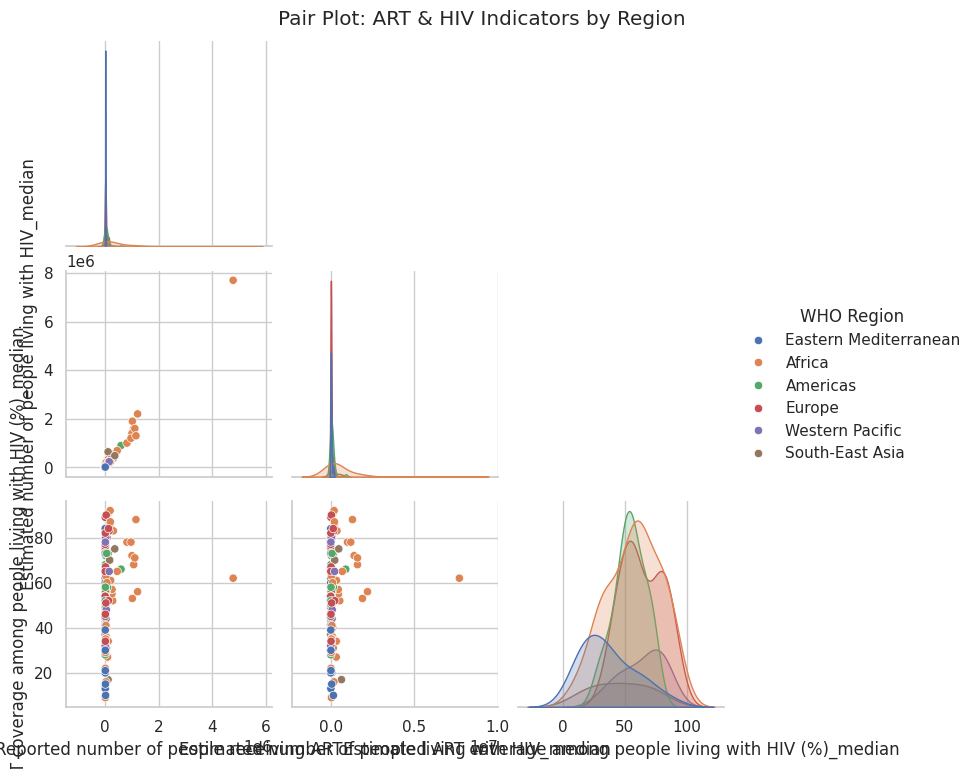

In [ ]:
pair_cols = [
    'Reported number of people receiving ART',
    'Estimated number of people living with HIV_median',
    'Estimated ART coverage among people living with HIV (%)_median'
]

df_pair1 = df_art[pair_cols + ['WHO Region']].copy()

# Clean numeric columns
for col in pair_cols:
    df_pair1[col] = pd.to_numeric(df_pair1[col], errors='coerce')

# Drop rows with missing values
df_pair1 = df_pair1.dropna()

sns.pairplot(
    df_pair1,
    vars=pair_cols,
    hue='WHO Region',
    corner=True
)
plt.suptitle("Pair Plot: ART & HIV Indicators by Region", y=1.02)
plt.show()


### **Interpretation: Pair Plot – ART Recipients, PLHIV, and ART Coverage (by WHO Region)**

This pair plot shows the relationships between ART recipients, people living with HIV (PLHIV), and ART coverage (%), with colors representing WHO regions.

A clear strong positive relationship is visible between the number of people receiving ART and the number of people living with HIV. Countries with larger HIV populations consistently report higher numbers of people on ART, especially in the African region, which stands out with the largest values.

In contrast, ART coverage (%) shows little direct relationship with either ART recipients or PLHIV. Countries with similar HIV burdens can have very different coverage levels, indicating that coverage depends more on program effectiveness and access, not just epidemic size.

Regional patterns are evident in the distribution plots. Europe and the Americas tend to cluster at higher ART coverage levels, suggesting more consistent treatment access. Africa and South-East Asia show wider spreads, with both low and high coverage values, reflecting uneven progress across countries.

Overall, the pair plot reinforces that while HIV burden strongly drives ART numbers, achieving high ART coverage requires targeted health system and policy interventions beyond simply expanding treatment to large populations.

# **5. Box Plot with Hue (Adult HIV Cases)**

Variables: WHO Region, HIV Cases, Year

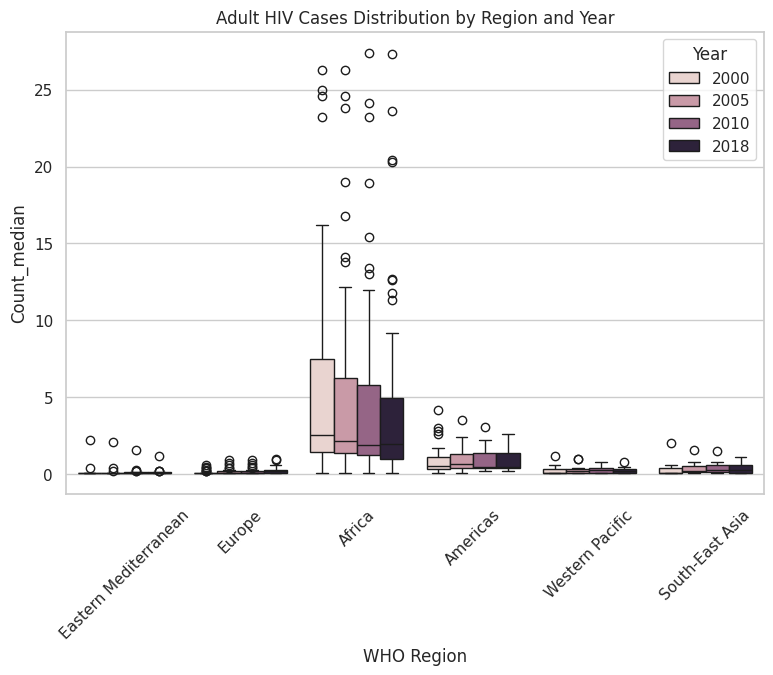

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(
    x='WHO Region',
    y='Count_median',
    hue='Year',
    data=df_cases
)
plt.title("Adult HIV Cases Distribution by Region and Year")
plt.xticks(rotation=45)
plt.show()


### **Interpretation: Adult HIV Cases Distribution by Region and Year (Box Plot)**

This box plot compares the distribution of adult HIV cases across WHO regions over multiple years (2000, 2005, 2010, and 2018).

Overall, the African region shows the highest median number of adult HIV cases and the widest spread in every year. The large boxes and numerous outliers indicate substantial variation between countries, reflecting the heavy and uneven HIV burden across the region. Although the median appears to gradually decline over time, Africa continues to carry the largest share of cases.

Other regions—such as Europe, the Americas, South-East Asia, Eastern Mediterranean, and Western Pacific—display much lower median case counts and narrower distributions. This suggests comparatively smaller epidemics and more consistency across countries within these regions.

Across most regions, there is a slight downward shift in medians from 2000 to 2018, indicating gradual progress in controlling adult HIV cases. However, the presence of outliers in later years shows that some countries still experience relatively high case numbers despite overall improvements.

**Key Insight**

Adult HIV cases remain concentrated in Africa, with persistent inequalities between countries. While most regions show signs of stabilization or decline over time, continued region-specific and country-level interventions are essential—particularly in high-burden African countries—to further reduce adult HIV cases.

# **6.Violin Plot (Deaths by Region & Year)**

Variables: Deaths, WHO Region, Year

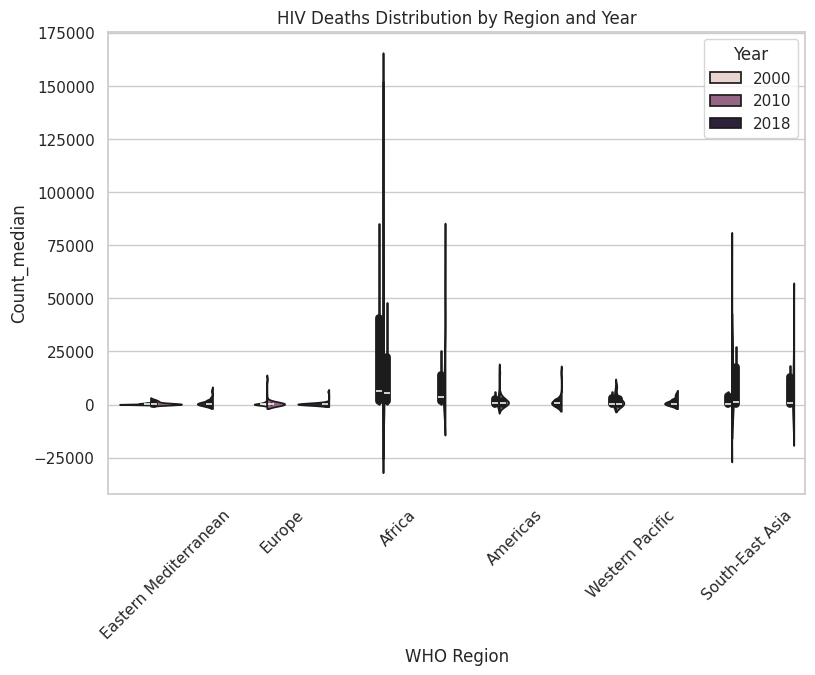

In [ ]:
plt.figure(figsize=(9,6))
sns.violinplot(
    x='WHO Region',
    y='Count_median',
    hue='Year',
    data=df_deaths,
    split=True
)
plt.title("HIV Deaths Distribution by Region and Year")
plt.xticks(rotation=45)
plt.show()


**Interpretation: HIV Deaths Distribution by Region and Year (Violin Plot)**

This violin plot shows the distribution of HIV-related deaths across WHO regions, comparing two time points (2010 and 2018).

The African region stands out clearly, with the widest and tallest violins, indicating the highest number of HIV-related deaths and the greatest variation between countries in both years. While deaths remain high, the shape of the 2018 violin suggests a slight shift toward lower values compared to 2010, reflecting gradual improvements in treatment access and survival.

Other regions—Europe, the Americas, Eastern Mediterranean, Western Pacific, and South-East Asia—show much narrower violins, meaning lower death counts and less variability across countries. In these regions, the distributions for 2010 and 2018 are relatively close, with some showing modest declines over time.

Overall, the comparison between years indicates a general reduction or stabilization of HIV-related deaths, particularly outside Africa. However, the continued wide spread in Africa highlights persistent inequalities and the ongoing impact of HIV in high-burden settings.

**Key Insight**

HIV-related deaths have generally declined over time, especially in regions with strong treatment coverage. Despite progress, Africa continues to experience the highest and most uneven mortality burden, emphasizing the need for sustained ART scale-up and targeted mortality-reduction strategies.

# **7. Scatter Plot**

Adult HIV Cases vs Deaths (Hue = Region, Size = PLHIV)

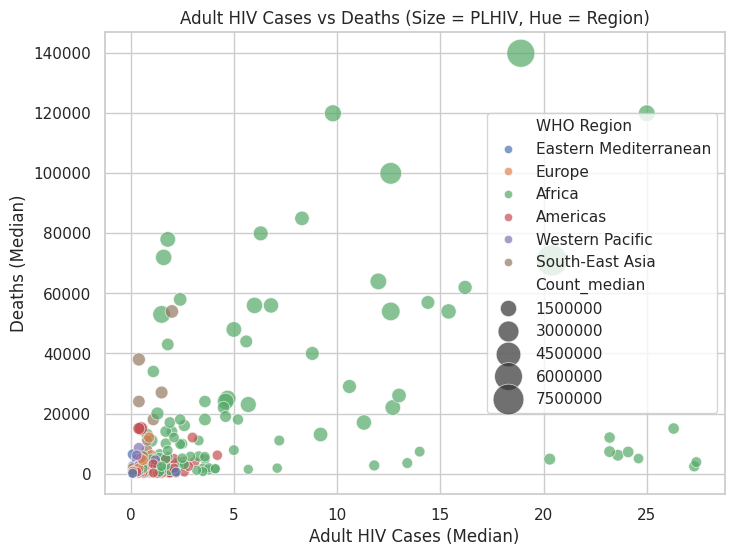

In [ ]:
df_merge = df_cases.merge(
    df_deaths, on=['Country','Year','WHO Region'], suffixes=('_cases','_deaths')
).merge(
    df_plhiv, on=['Country','Year','WHO Region']
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_merge,
    x='Count_median_cases',
    y='Count_median_deaths',
    hue='WHO Region',
    size='Count_median',
    sizes=(50, 500),
    alpha=0.7
)
plt.title("Adult HIV Cases vs Deaths (Size = PLHIV, Hue = Region)")
plt.xlabel("Adult HIV Cases (Median)")
plt.ylabel("Deaths (Median)")
plt.show()


### **Interpretation: Adult HIV Cases vs Deaths**

This scatter plot shows the relationship between adult HIV cases (x-axis) and HIV-related deaths (y-axis) across countries, with color indicating WHO region and bubble size representing the number of people living with HIV (PLHIV).

There is a positive relationship: countries with higher adult HIV cases generally report higher deaths.

African region countries are more widely spread and dominate the upper ranges of both cases and deaths, indicating a heavier HIV burden.

Countries from Europe, Americas, and Western Pacific cluster near the lower-left, reflecting lower case counts and deaths.

Larger bubbles (higher PLHIV) are often associated with higher deaths, showing that countries with larger HIV-affected populations face greater mortality impact.

Some countries show high cases but relatively lower deaths, suggesting better treatment coverage or healthcare access.

**Key Insight:**

The plot highlights a clear positive relationship between adult HIV cases and deaths, with African countries bearing the highest burden and largest populations living with HIV. Regions such as Europe, the Americas, and the Western Pacific show lower case and death counts, indicating better control. Larger PLHIV populations are generally associated with higher deaths, but some countries manage lower mortality despite higher cases, suggesting that effective ART coverage and healthcare systems play a crucial role in reducing HIV-related deaths.

## **8. Line Chart – HIV Cases Over Time by Region**

Variables: Year, HIV Cases, WHO Region

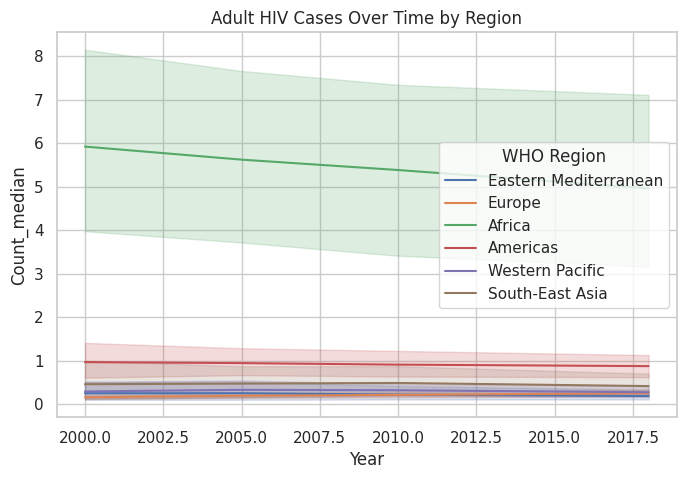

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df_cases,
    x='Year',
    y='Count_median',
    hue='WHO Region'
)
plt.title("Adult HIV Cases Over Time by Region")
plt.show()


### **Interpretation: Adult HIV Cases Over Time by Region (Line Chart)**

This line chart shows how adult HIV cases (median counts) have changed over time across WHO regions from 2000 to 2018.

The African region consistently has the highest number of adult HIV cases throughout the entire period. Although there is a gradual downward trend, the decline is slow, indicating that Africa continues to carry the largest HIV burden despite some progress over time.

All other regions—Americas, Europe, South-East Asia, Western Pacific, and Eastern Mediterranean—show much lower case counts and relatively stable or slightly declining trends. This suggests better control of the epidemic or smaller affected populations in these regions.

The Americas and Europe remain fairly flat over time, indicating stabilization rather than rapid decline. The Eastern Mediterranean and Western Pacific regions show consistently low levels with minimal variation.

**Key Insight**

While adult HIV cases have declined modestly over time, the global burden remains heavily concentrated in Africa. Continued prevention, early diagnosis, and treatment efforts—especially in high-burden regions—are essential to achieve more substantial reductions in adult HIV cases worldwide.

## **9. Bubble Chart – PLHIV vs Deaths**

Variables: PLHIV, Deaths, WHO Region

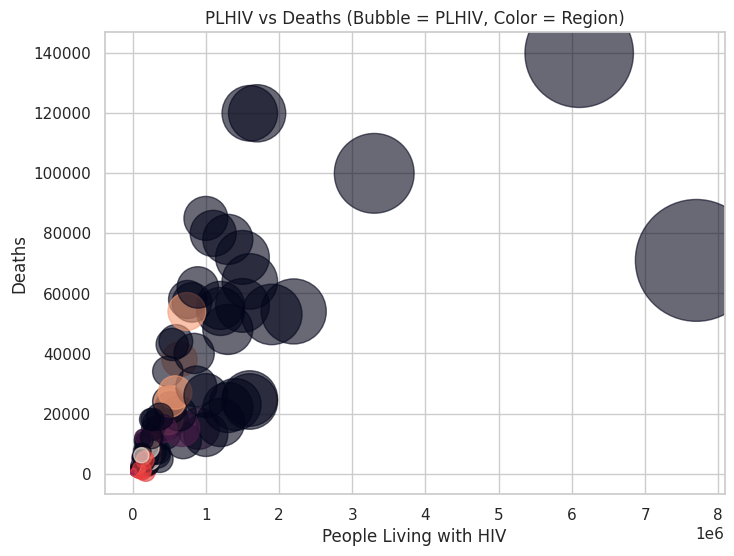

In [ ]:
merged = df_plhiv.merge(df_deaths, on=['Country','Year','WHO Region'])

plt.figure(figsize=(8,6))
plt.scatter(
    merged['Count_median_x'],
    merged['Count_median_y'],
    s=merged['Count_median_x']/1000,
    c=pd.Categorical(merged['WHO Region']).codes,
    alpha=0.6
)
plt.xlabel("People Living with HIV")
plt.ylabel("Deaths")
plt.title("PLHIV vs Deaths (Bubble = PLHIV, Color = Region)")
plt.show()


### **Interpretation: PLHIV vs Deaths (Bubble Chart)**

This bubble chart shows the relationship between the number of people living with HIV (PLHIV) and HIV-related deaths, with bubble size representing PLHIV and color indicating WHO region. Countries with higher PLHIV generally report higher deaths, indicating a strong positive association. Large bubbles appearing at higher death levels highlight countries where the HIV burden is substantial. Regional clustering shows that some WHO regions consistently experience both higher PLHIV and higher mortality, while others remain concentrated at lower values.

## **10.Heatmap – Correlation Between Numeric Variables (Seaborn)**

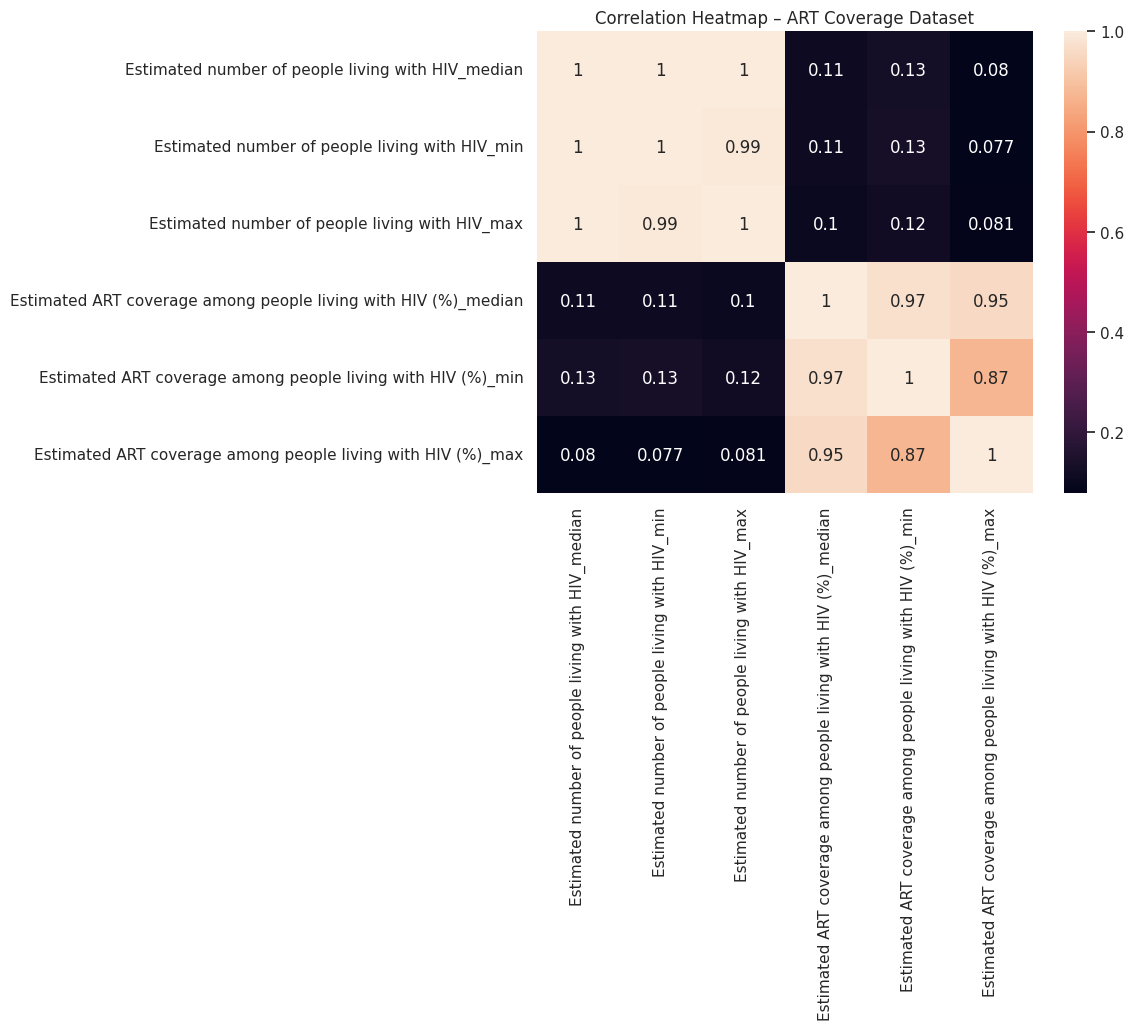

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df_art.select_dtypes(include='number').corr(),
    annot=True
)
plt.title("Correlation Heatmap – ART Coverage Dataset")
plt.show()


## **Interpretation (Correlation Heatmap – ART Coverage Dataset)**

The estimated number of people living with HIV (PLHIV) variables (min, median, max) are perfectly and strongly correlated with each other, indicating consistent HIV population estimates.

Similarly, ART coverage percentages (min, median, max) show a very strong positive correlation, meaning countries with higher ART coverage remain consistently high across estimates.

However, the correlation between PLHIV counts and ART coverage percentages is weak, suggesting that having a larger HIV population does not necessarily imply better ART coverage.

## **11. Pair Plot**

Variables: Median, Min, Max ART Coverage

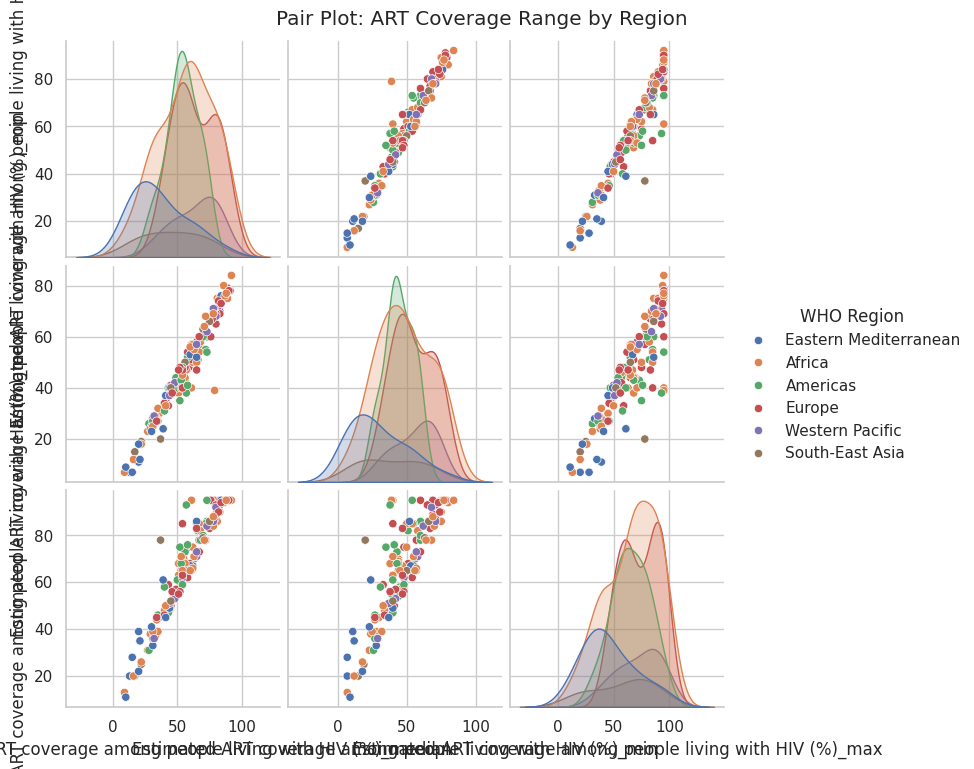

In [ ]:
pair_cols2 = [
    'Estimated ART coverage among people living with HIV (%)_median',
    'Estimated ART coverage among people living with HIV (%)_min',
    'Estimated ART coverage among people living with HIV (%)_max'
]

df_pair2 = df_art[pair_cols2 + ['WHO Region']].copy()

for col in pair_cols2:
    df_pair2[col] = pd.to_numeric(df_pair2[col], errors='coerce')

df_pair2 = df_pair2.dropna()

sns.pairplot(
    df_pair2,
    vars=pair_cols2,
    hue='WHO Region',
    diag_kind='kde'
)
plt.suptitle("Pair Plot: ART Coverage Range by Region", y=1.02)
plt.show()


## **Interpretation (Pair Plot – ART Coverage Range by Region)**

The median, minimum, and maximum ART coverage values show a strong positive linear relationship, indicating consistent ART coverage estimates across countries.

Diagonal density plots reveal regional differences, with Europe and the Western Pacific generally concentrated at higher ART coverage levels, while Africa and South-East Asia show wider spread and lower coverage ranges.

The close clustering along straight lines suggests low variability between min, median, and max values within countries.

**Conclusion:**

Multivariate analysis was performed to explore complex relationships among HIV indicators by incorporating more than two variables simultaneously. Visual encodings such as color, size, multiple lines, and correlation matrices were used to identify regional patterns, trends over time, and interdependencies among treatment, prevalence, and mortality indicators.